1 Data Exploration

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('twitter_csv.csv',encoding='ISO-8859-1')


In [3]:

print("\nFirst few rows:")
df.head()


First few rows:


,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew


In [4]:
print("Dataset Info:")
print(df.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 6 columns):
 #   Column                                                                                                               Non-Null Count    Dtype 
---  ------                                                                                                               --------------    ----- 
 0   0                                                                                                                    1048575 non-null  int64 
 1   1467810369                                                                                                           1048575 non-null  int64 
 2   Mon Apr 06 22:19:45 PDT 2009                                                                                         1048575 non-null  object
 3   NO_QUERY                                                                                                             1048575 non-null 

In [5]:
# Rename columns for clarity
df.columns = ['target', 'id', 'date', 'flag', 'user', 'text']

2.Data Cleaning

In [6]:
# Check for missing values
print("Missing values:")
print(df.isnull().sum())

Missing values:
target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64


In [7]:
# Handle duplicates
df.drop_duplicates(inplace=True)

In [8]:
# Drop irrelevant columns
df = df.drop(columns=['id', 'date', 'flag', 'user'])

In [9]:
print("\nCleaned dataset: ")
print(df.head())


Cleaned dataset: 
   target                                               text
0       0  is upset that he can't update his Facebook by ...
1       0  @Kenichan I dived many times for the ball. Man...
2       0    my whole body feels itchy and like its on fire 
3       0  @nationwideclass no, it's not behaving at all....
4       0                      @Kwesidei not the whole crew 


3 .Exploratory Data Analysis (EDA)

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df['target'].value_counts()

target
0    799999
4    248576
Name: count, dtype: int64

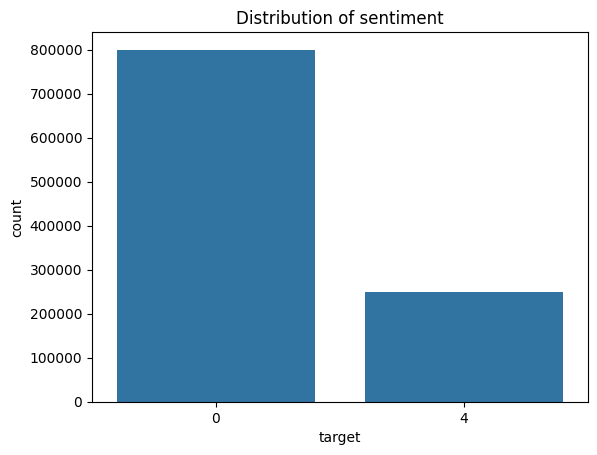

In [12]:
sns.countplot(data=df,x='target')
plt.title('Distribution of sentiment')
plt.show()

4. Generate word cloud ->most frequent word show

In [13]:
from wordcloud import WordCloud

In [14]:
positive_words = ' '.join([text for text in df[df['target'] == 4]['text']])
negative_words = ' '.join([text for text in df[df['target'] == 0]['text']])

In [15]:
wordcloud_positive = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(positive_words)
wordcloud_negative = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(negative_words)

Text(0.5, 1.0, 'Positive Sentiment Word Cloud')

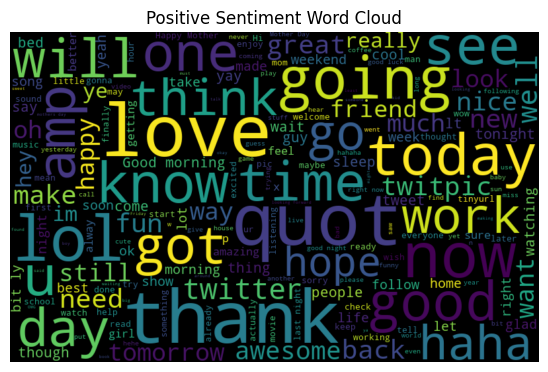

In [16]:
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')

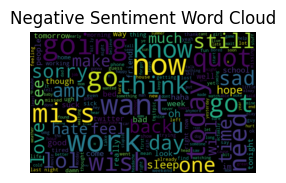

In [17]:
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()

5. Sentiment Prediction Model

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report

#splitting the dataset
X=df['text']  # Features(tweets)
y=df['target']  # labels(sentiment)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

# Vectorize the text 
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# 7. Train and Evaluate Logistic Regression Classifier
logistic_model = LogisticRegression(max_iter=1000, random_state=42)
logistic_model.fit(X_train_vec, y_train)

# Predict and evaluate
y_pred_logistic = logistic_model.predict(X_test_vec)

print(f"Accuracy: {accuracy_score(y_test, y_pred_logistic)}")

print(f"F1 Score: {f1_score(y_test, y_pred_logistic, average='weighted')}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_logistic))

Accuracy: 0.8331831294852537
F1 Score: 0.8217485880582053

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.94      0.90    160026
           4       0.71      0.49      0.58     49689

    accuracy                           0.83    209715
   macro avg       0.79      0.72      0.74    209715
weighted avg       0.82      0.83      0.82    209715

